In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import explore
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met


# Acquire Data from SQL 

In [2]:
test_1= acquire.get_telco_data()


# Began Preperation of data

In [3]:
test_1=prepare.prepare_that_data(test_1)
test_1.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,number_services,monthly_avg
0,1,2,2,0002-ORFBO,9,1,0,0,1,0,1,1,0,1,65.6,593.30,0,6,1
1,1,2,1,0003-MKNFE,9,1,1,0,0,0,0,0,1,0,59.9,542.40,0,4,0
2,1,1,1,0004-TLHLJ,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,4,1
3,1,1,1,0011-IGKFF,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,7,1
4,1,2,1,0013-EXCHZ,3,1,0,0,0,0,1,1,0,1,83.9,267.40,1,5,1


In [27]:
train, validate, test = prepare.train_validate_test_split(test_1, 'churn', seed=123)
#drops = ['customer_id']
#[dataset.drop(columns=drops, inplace=True) for dataset in [train, validate, test]]
train.columns, validate.columns
X_train = train.drop(columns='churn')
y_train = train.churn

# Explore

Our baseline accuracy for churn in all cases on the Telco Dataset is 0.734


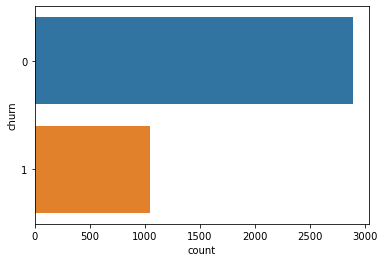

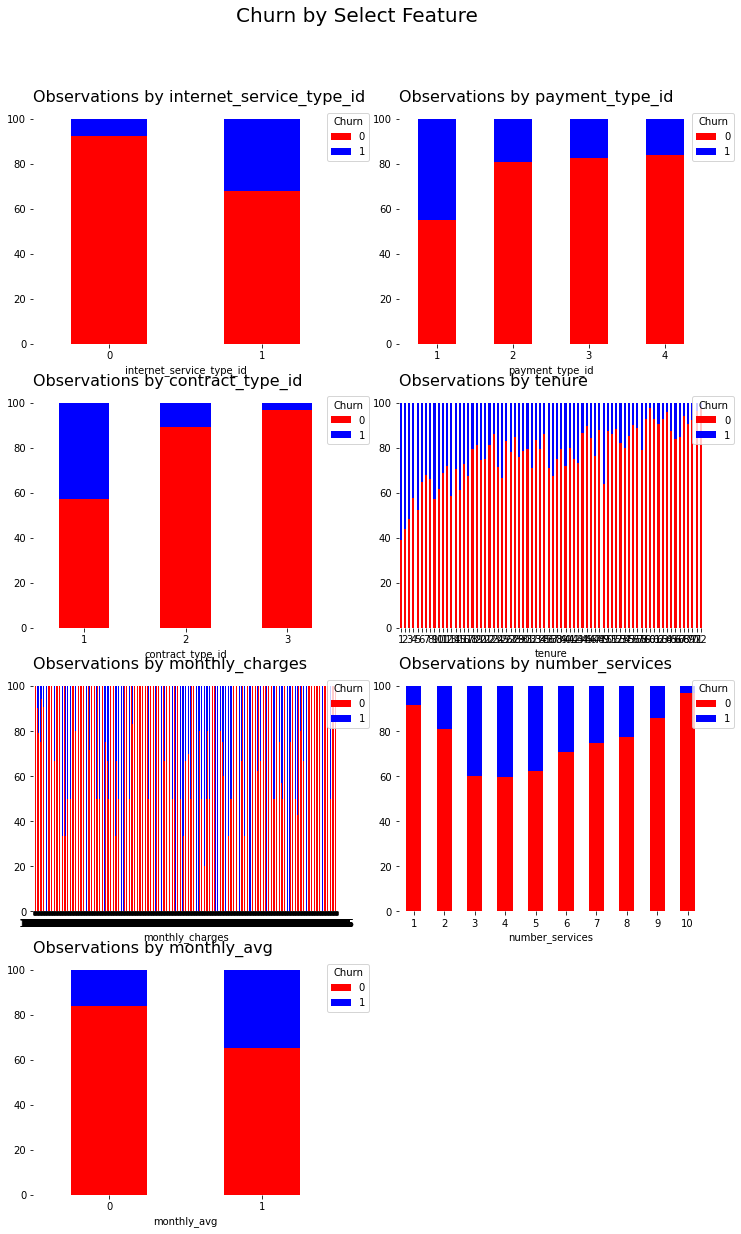

In [28]:

print(f'Our baseline accuracy for churn in all cases on the Telco Dataset is {(y_train == 0).mean():.3}')
explore.lets_make_some_graphs(train)

In [29]:
train.describe()


,internet_service_type_id,payment_type_id,contract_type_id,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,number_services,monthly_avg
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.779782,2.346203,1.693167,32.775210,0.905258,0.423927,0.292609,0.348743,0.349759,0.289307,0.386335,0.391415,0.590297,64.805131,2316.775641,0.265685,4.757430,0.560325
std,0.414447,1.155924,0.836075,24.709604,0.292896,0.494242,0.455018,0.476633,0.476954,0.453498,0.486971,0.488129,0.491841,30.294804,2284.984394,0.441753,2.496102,0.496411
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.850000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.700000,396.100000,0.000000,3.000000,0.000000
50%,1.000000,2.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.250000,1414.800000,0.000000,5.000000,1.000000
75%,1.000000,3.000000,2.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.300000,3893.600000,1.000000,7.000000,1.000000
max,1.000000,4.000000,3.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.650000,8594.400000,1.000000,10.000000,1.000000


In [30]:
bill_above = train[train.monthly_avg ==1 ]
bill_bellow = train[train.monthly_avg == 0]
bill_above.shape, bill_bellow.shape

((2206, 19), (1731, 19))

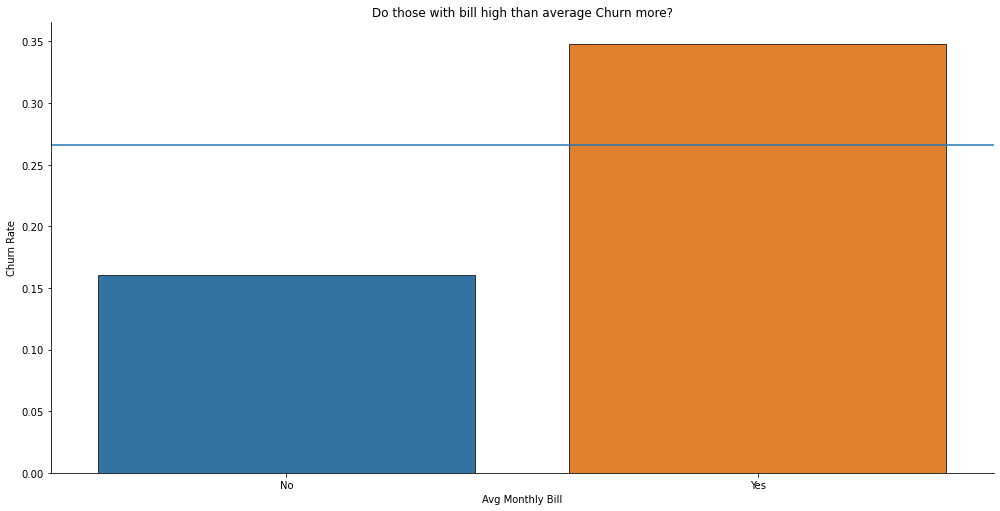

Churn rate of those whose montly bill is above montly avg 0.3481
Churn rate of those whose montly bill is below montly avg 0.1606


In [31]:
explore.average_plot(train)

# Hypothesis

## alpha = .05

## $H_0$: There is no difference in churn between those whose monthly bill is above or below Average monthly bill

## $H_a$ : There is a significant difference in churn between those wwhose monthly bill is above or below Average monthly bill

In [32]:
bill_above = train[train.monthly_avg ==1 ]
bill_bellow = train[train.monthly_avg == 0]
bill_above.shape, bill_bellow.shape
# T-Test
variance = bill_above.churn.var() == bill_bellow.churn.var()
α = .05
t, p = stats.ttest_ind(bill_above.churn, bill_bellow.churn, equal_var=variance)
if p < α:
    print('We reject the null hypothesis.')
else:
    print('The null hypothesis is confirmed')

We reject the null hypothesis.


# Lets look at Number of Services Provided. 

In [33]:
high_service = train[train.number_services > 1]
low_service = train[train.number_services == 1]
high_service.shape, low_service.shape

((3426, 19), (511, 19))

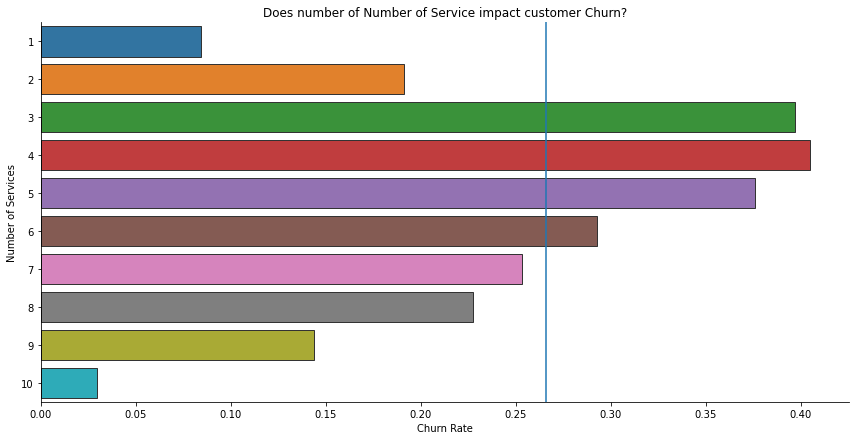

In [34]:
p = sns.factorplot( x="churn", y="number_services",  data=train, size=6, 
                   aspect=2, orient="h", kind="bar", palette="tab10", ci=None, 
                   edgecolor=".2")
baseline = round(train.churn.mean() ,4)
plt.axvline(baseline, label = 'overall churn rate')

p.set_ylabels("Number of Services")
p.set_xlabels("Churn Rate")
plt.title('Does number of Number of Service impact customer Churn?')
plt.show()

# Hypothesis

## alpha = .05

## $H_0$: Churn is independent of the number services a customer has

## $H_a$ : Churn is dependent of the number services a customer has

In [35]:


observed = pd.crosstab(train.churn, train.number_services)

chi2, p, degf, expected = stats.chi2_contingency(observed)

expected = pd.DataFrame(expected).astype(int)

print('Observed\n')
print(pd.DataFrame(observed.values))
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('')

if p < α:
    print('We reject the null hypothesis.')
else:
    print('The null hypothesis is confirmed')

Observed

     0    1    2    3    4    5    6    7    8   9
0  468  360  234  282  312  377  345  268  179  66
1   43   85  154  192  188  156  117   79   30   2
---
Expected

     0    1    2    3    4    5    6    7    8   9
0  375  326  284  348  367  391  339  254  153  49
1  135  118  103  125  132  141  122   92   55  18
---

chi^2 = 252.0358
p     = 0.0000

We reject the null hypothesis.


# Lets look at some models now

In [36]:
train.columns.values.tolist()

['internet_service_type_id',
 'payment_type_id',
 'contract_type_id',
 'customer_id',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'number_services',
 'monthly_avg']

In [37]:
features= ['internet_service_type_id',
 'payment_type_id',
 'contract_type_id',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'number_services',
 'monthly_avg']
X_train = train[features]
X_validate = validate[features]
X_test = test[features]
X_train.shape, X_validate.shape, X_test.shape


((3937, 17), (1688, 17), (1407, 17))

In [38]:
y_train = train.churn
y_validate = validate.churn
y_test = test.churn
y_train.shape, y_validate.shape, y_test.shape

((3937,), (1688,), (1407,))

In [39]:
for i in range(2, 21):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.770947     0.781609  0.771654     0.776278      0.773780
recall        0.980284     0.195029  0.771654     0.587656      0.771654
f1-score      0.863103     0.312165  0.771654     0.587634      0.716728
support    2891.000000  1046.000000  0.771654  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.799133     0.735849  0.791466     0.767491      0.782319
recall        0.956416     0.335564  0.791466     0.645990      0.791466
f1-score      0.870729     0.460932  0.791466     0.665831      0.761852
support    2891.000000  1046.000000  0.791466  3937.000000   3937.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.815758     0.719533  0.801118     0.767645      0.790192
recall        0.941889     0.412046  0.801118  

    max_depth  train_accuracy  validate_accuracy  difference
0           2        0.771654           0.755924    0.015729
1           3        0.791466           0.775474    0.015992
2           4        0.801118           0.787322    0.013795
3           5        0.810770           0.795024    0.015746
4           6        0.821692           0.788507    0.033185
5           7        0.829820           0.783768    0.046052
6           8        0.848616           0.794431    0.054184
7           9        0.869698           0.792654    0.077044
8          10        0.901448           0.791469    0.109979
9          11        0.929642           0.787322    0.142320
10         12        0.957836           0.783175    0.174661
11         13        0.977648           0.774882    0.202766
12         14        0.984506           0.780213    0.204293
13         15        0.992380           0.778436    0.213944
14         16        0.995936           0.779028    0.216908
15         17        0.9

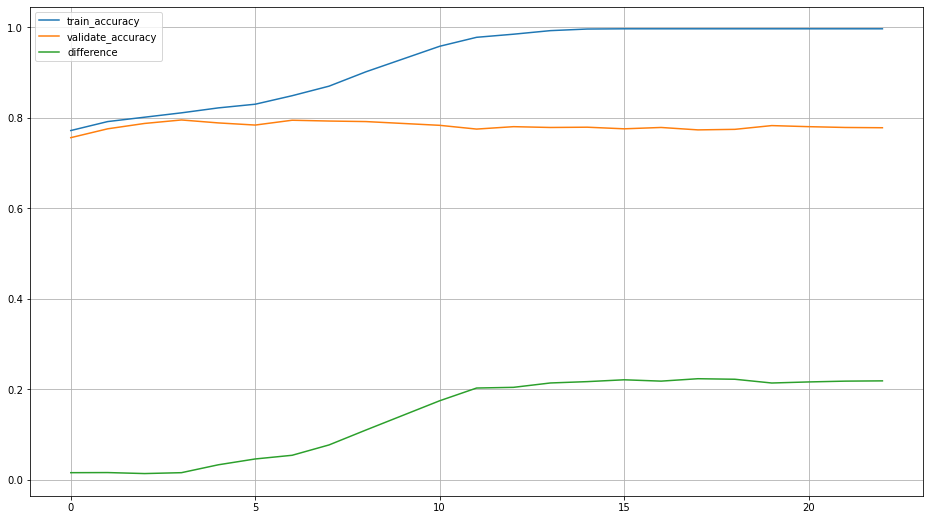

In [40]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
print(df)
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

In [41]:
 # create model
logit = LogisticRegression()

# fit model
logit.fit(X_train, y_train)

# make predictions
logit.predict_proba(X_train)[:10][:,1] > 0.5
y_pre= logit.predict(X_train)
y_pre_v=logit.predict(X_validate)

#output classification reports
print(' Training set')
print(classification_report(y_train, y_pre))
print(' Validation set')
print(classification_report(y_validate, y_pre_v))



 Training set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2891
           1       0.65      0.54      0.59      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.72      0.73      3937
weighted avg       0.79      0.80      0.79      3937

 Validation set
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1239
           1       0.62      0.54      0.58       449

    accuracy                           0.79      1688
   macro avg       0.73      0.71      0.72      1688
weighted avg       0.78      0.79      0.79      1688



In [42]:

forest1 = RandomForestClassifier(max_depth=5, random_state=123)

forest1.fit(X_train, y_train)


y_predictions = forest1.predict(X_train)


report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 5")
pd.DataFrame(report)

Tree of depth 5


,0,1,accuracy,macro avg,weighted avg
precision,0.834894,0.705321,0.81077,0.770107,0.800468
recall,0.925285,0.494264,0.81077,0.709775,0.810770
f1-score,0.877769,0.581225,0.81077,0.729497,0.798982
support,2891.000000,1046.000000,0.81077,3937.000000,3937.000000


# Run the test data Finally! 

In [43]:
y_pre_t= logit.predict(X_test)
print(classification_report(y_test, y_pre_t))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [44]:
# create the probabilities column based on our previously trained model
proba_test = pd.DataFrame(logit.predict_proba(X_test))
prob_col = (proba_test[1])

# create the predictions column based upon our previously trained model
pred_col = pd.Series(y_pre_t)

# create the customer id column
id_col = pd.Series(test.customer_id.to_list())

In [45]:
# create dataframe of our columns
output = pd.concat([id_col, prob_col, pred_col],axis=1)
output.head()

,0,1,1
0,4716-MRVEN,0.028990,0
1,8966-KZXXA,0.010068,0
2,8720-RQSBJ,0.394305,0
3,7504-UWHNB,0.410444,0
4,1730-VFMWO,0.107554,0


In [46]:
# export output to csv file
output.to_csv('Predictions.csv', index=False, header=False)